# Demonstration of Gaussian Processes

In [1]:
import sys
sys.path.insert(0,'/home/fenics/Installations/MUQ_INSTALL/lib')

import pymuqModeling as mm
import pymuqApproximation as ma

import matplotlib.pyplot as plt
import numpy as np

## One Spatial Dimension

In [2]:
xDim = 1
yDim = 1

numPts = 300
x = np.zeros((1,numPts))
x[0,:] = np.linspace(0,1,numPts)

mean = ma.ZeroMean(xDim,yDim)

# How many samples to plot for each kernel
numSamps = 3

In [3]:
def PlotSamples(gp):
    plt.figure(figsize=(12,6))
    
    for i in range(numSamps):
        plt.plot(x[0,:], gp.Sample(x)[0,:])
        
    plt.xlabel('Position $x$', fontsize=16)
    plt.ylabel('Field Value $y$', fontsize=16)
    plt.show()
    
def PlotKernel(kern):
    plt.figure(figsize=(12,6))
    
    numPlot = 100
    xs = np.zeros((1,numPlot))
    xs[0,:] = np.linspace(0,1,numPlot)
    
    base = np.array([0])
    ks = np.zeros((numPlot))
    for i in range(numPlot):
        ks[i] = kern.Evaluate(base,xs[:,i])[0,0]
        
    plt.plot(xs[0,:], ks,linewidth=3)
    plt.xlabel('Distance, $\|x-x^\prime\|$', fontsize=16)
    plt.ylabel('$k(x,x^\prime)$', fontsize=16)
    plt.ylim([0,1.1*np.max(ks)])
    plt.show()

### Squared Exponential Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{1}{2} \frac{\|x-x^\prime\|^2}{L^2}\right]
$$

In [4]:
var = 1.0 # Marginal Variance
length = 0.2 # Lengthscale of the kernel

kern = ma.SquaredExpKernel(xDim, var, length)

gp = ma.GaussianProcess(mean, kern)

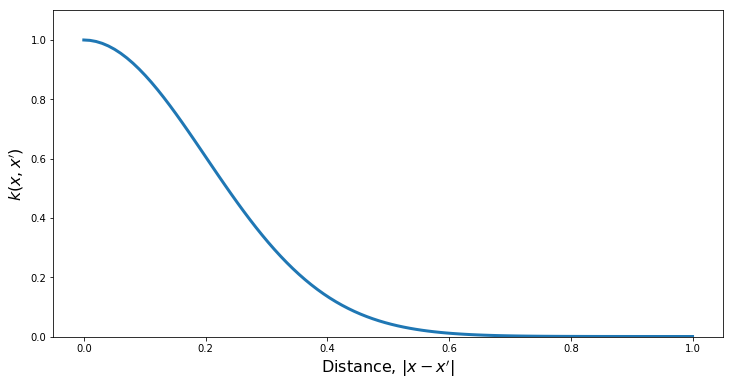

In [5]:
PlotKernel(kern)

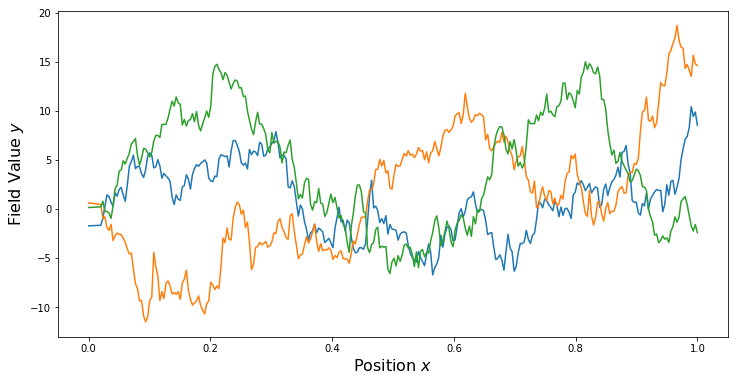

In [6]:
PlotSamples(gp)

### Matern Kernel
$$
k(x,x^\prime) = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)^{\nu} K_\nu\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)
$$

In [7]:
var = 1.0    # Marginal Variance
length = 0.2 # Lengthscale of the kernel
nu = 5.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

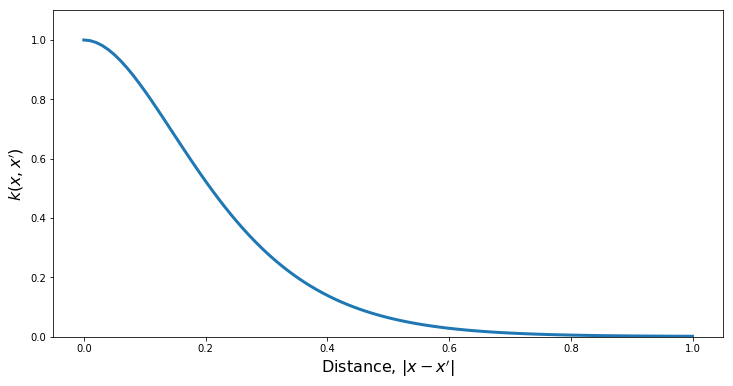

In [8]:
PlotKernel(kern)

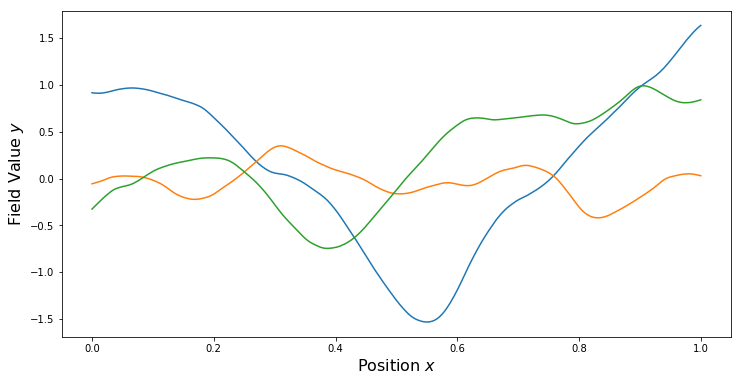

In [9]:
PlotSamples(gp)

In [10]:
nu = 3.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

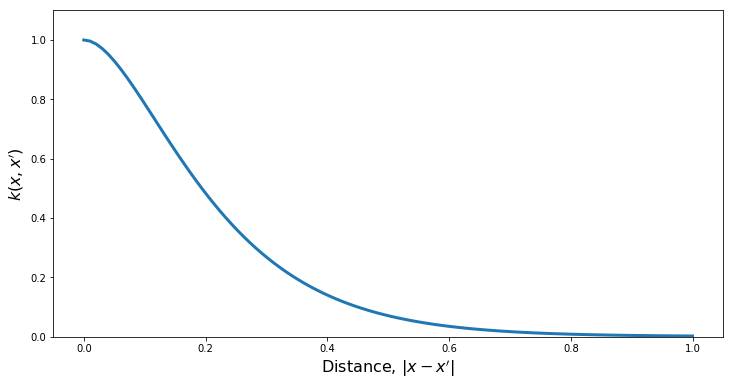

In [11]:
PlotKernel(kern)

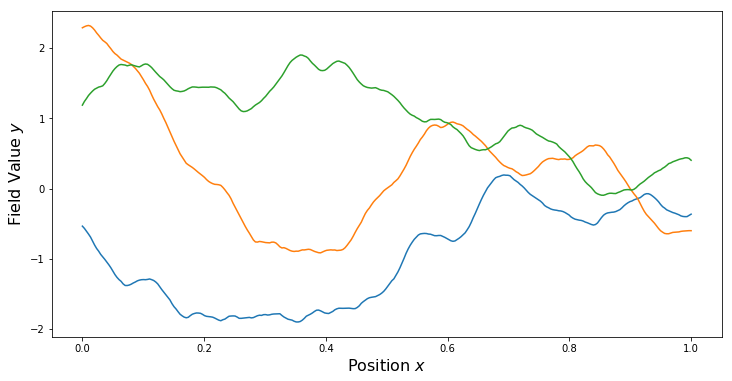

In [12]:
PlotSamples(gp)

In [13]:
nu = 1.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

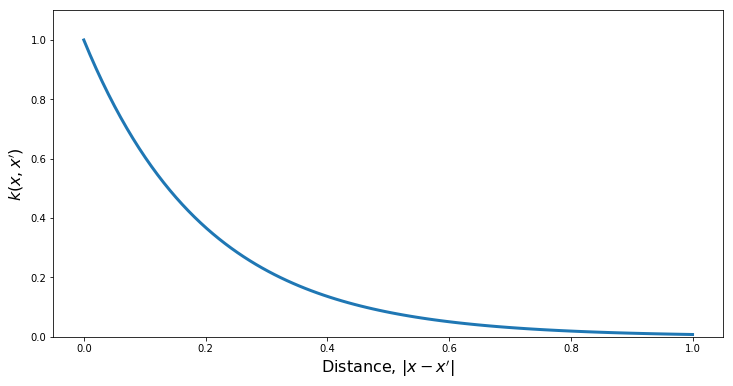

In [14]:
PlotKernel(kern)

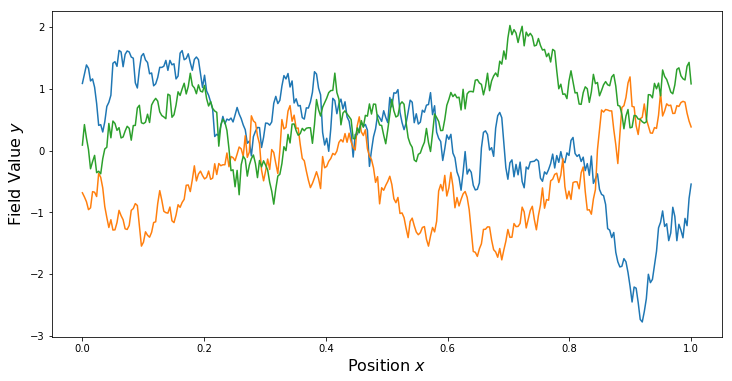

In [15]:
PlotSamples(gp)

### Periodic Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{2}{L^2} \sin^2\left(\frac{\pi}{P}\|x-x^\prime\|\right) \right];
$$

In [16]:
var = 1.0    # Marginal Variance
length = 1.5 # Lengthscale of the kernel
period = 0.5 # Period

kern = ma.PeriodicKernel(xDim, var, length, period)

gp = ma.GaussianProcess(mean, kern)

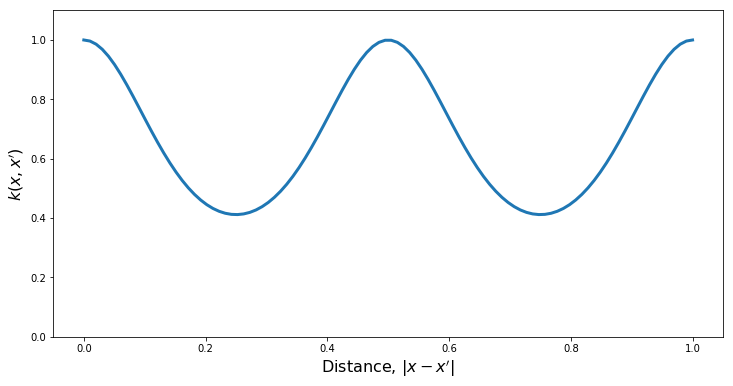

In [17]:
PlotKernel(kern)

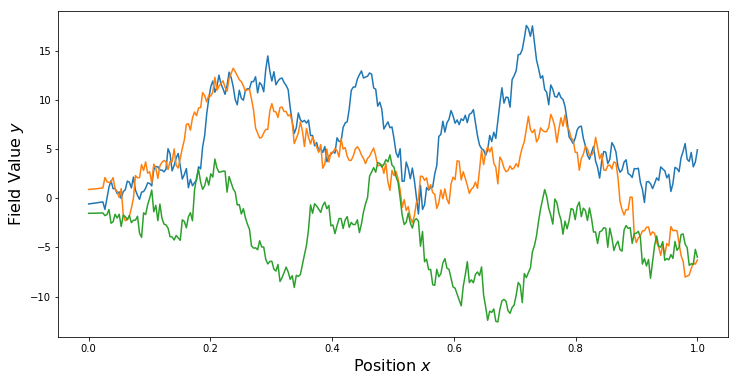

In [18]:
PlotSamples(gp)

### Constant Kernel
$$
k(x,x^\prime) = \sigma^2
$$

In [19]:
var = 1.0

kern = ma.ConstantKernel(xDim, var)

gp = ma.GaussianProcess(mean, kern)

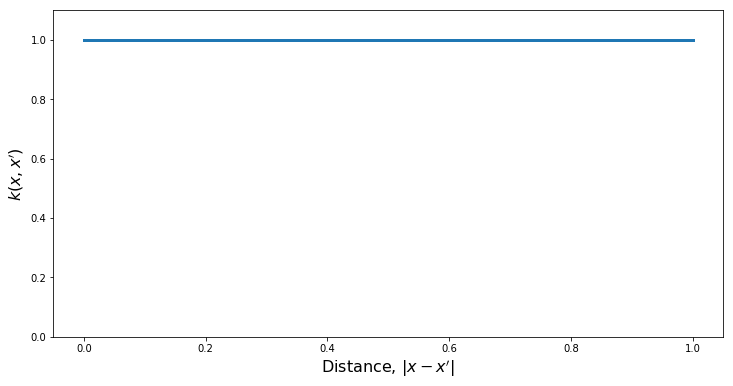

In [20]:
PlotKernel(kern)

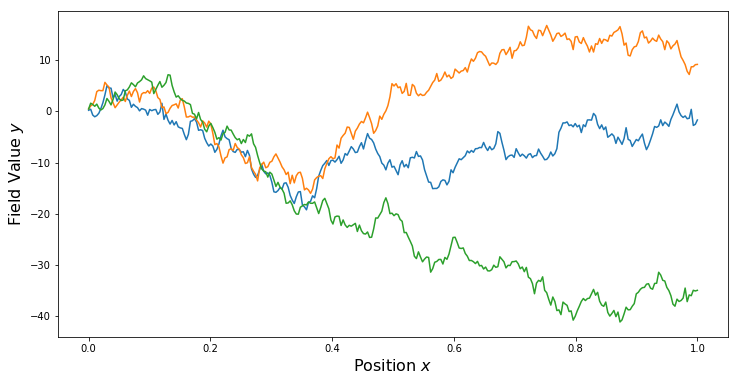

In [21]:
PlotSamples(gp)

### Quasi-Periodic Kernels
For some non-periodic kernel $k_2$ and a periodic kernel $k_{per}$, a quasi-periodic kernel can be formed through the product.
$$
k(x,x^\prime) = k_{per}(x,x^\prime) k_2(x,x^\prime)
$$

In [22]:
perVar = 1.0     # Marginal Variance
perLength = 1.5  # Lengthscale of the kernel
perPeriod = 0.25 # Period

matVar = 1.0     # Matern Variance
matLength = 0.5  # Matern Length
matNu = 3.0/2.0  # Matern Smoothness

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.PeriodicKernel(xDim, perVar, perLength, perPeriod)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

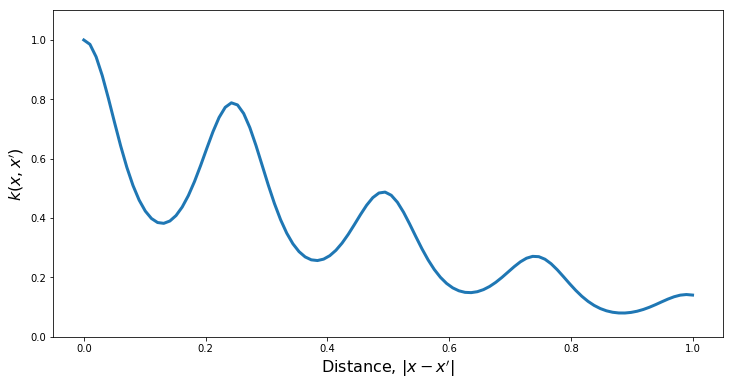

In [23]:
PlotKernel(kern)

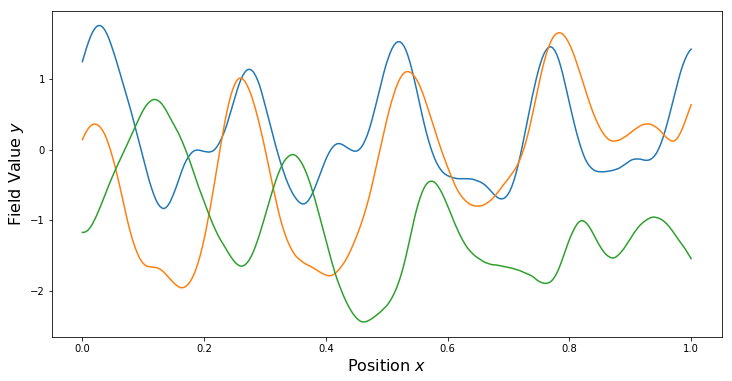

In [24]:
PlotSamples(gp)

### Sum Kernels


In [25]:
constVar = 50.0

matVar = 1.0
matLength = 0.2
matNu = 1.0/2.0

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.ConstantKernel(xDim, constVar)
kern = kern1 + kern2

gp = ma.GaussianProcess(mean, kern)

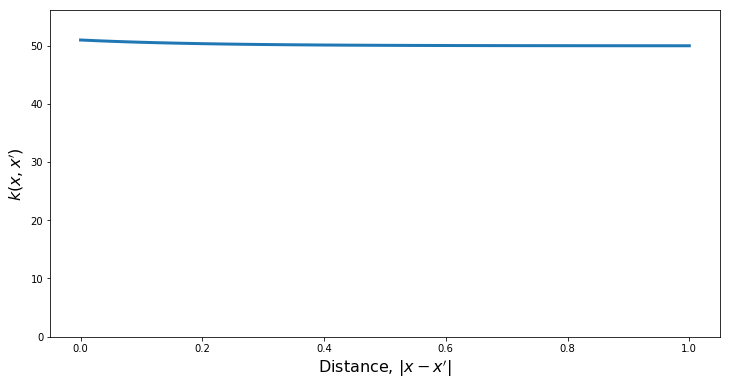

In [26]:
PlotKernel(kern)

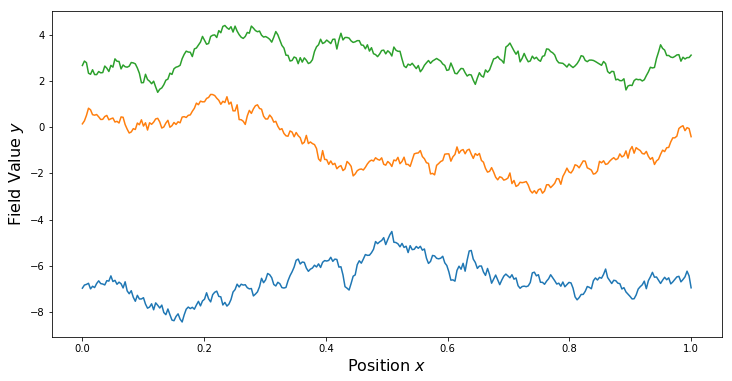

In [27]:
PlotSamples(gp)

## Two Spatial Dimensions

In [28]:
import ipywidgets as wd
from matplotlib import cm

In [29]:
xDim, yDim = 2, 1
mean = ma.ZeroMean(xDim, yDim)
min_ht, max_ht = 0, 5
def PlotSamples2d(gp, numPts=20, numSamps=3):
    # Construct the grid points
    x1 = np.linspace(0,1,numPts)
    x2 = np.linspace(0,1,numPts)
    X1, X2 = np.meshgrid(x1,x2)
    
    x = np.zeros((2,numPts*numPts))

    x[0,:] = X1.ravel()
    x[1,:] = X2.ravel()
    
    c = cm.get_cmap('RdBu')
    
    gauss = gp.Discretize(x)
    fig, axs = plt.subplots(nrows=1, ncols=numSamps, figsize=(16,5))
    for i in range(numSamps):
        samp = gauss.Sample()
        axs[i].pcolor(X1, X2, np.reshape(samp, (numPts,numPts)), cmap=c, vmin=min_ht, vmax=max_ht)
        axs[i].set_title('Sample %d'%i)
#     plt.colorbar()    
    plt.show()
        


### Isotropic Matern

In [30]:
# var = 1.0    # Marginal Variance
# length = 0.2 # Lengthscale of the kernel
# nu = 5.0/2.0 # Smoothness parameter
def iso_mat(var=1.0, length=0.2, smooth=5.0, numPts=20, numSamps=3):
    nu  = (2.0*smooth - 1.0) /2.0 # enforce odd-numbers only. 
    kern = ma.MaternKernel(xDim, var, length, nu)

    gp = ma.GaussianProcess(mean, kern)

    PlotSamples2d(gp, numPts, numSamps)
    
# iso_mat()    # can call without arguments. 

In [31]:
wd.interactive(iso_mat, 
               var=wd.FloatSlider(value=1.0, max=5.0, min=0.05, step=0.05, continuous_update=False),
               length=wd.FloatSlider(value=0.25, max=1.0, min=0.05, step=0.05, continuous_update=False),
               smooth=wd.SelectionSlider(value=1, options=[i for i in range(1,21)], continuous_update=False),
               numPts=wd.SelectionSlider(value=20, options=[i for i in range(20,51)], continuous_update=False),
               numSamps=wd.fixed(5)
              )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='var', max=5.0, min=0.05, step=0.05), FloatSlider(value=0.25, continuous_update=False, description='length', max=1.0, min=0.05, step=0.05), SelectionSlider(continuous_update=False, description='smooth', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), value=1), SelectionSlider(continuous_update=False, description='numPts', options=(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50), value=20), Output()), _dom_classes=('widget-interact',))

### Anisotropic Matern

In [32]:
# var = 1.0    # Marginal Variance
# length1= 0.1 # Lengthscale of the kernel in the x_1 direction
# length2= 0.3 # Lengthscale of the kernel in the x_2 direction

# nu1 = 3.0/2.0 # Smoothness in x1
# nu2 = 3.0/2.0 # Smoothness in x2
def aniso_mat(var=1.0, length1=0.1, smooth1=3.0, length2=0.3, smooth2=3.0, numPts=20, numSamps=3):
    nu1  = (2.0*smooth1 - 1.0) /2.0 # enforce odd-numbers only. 
    nu2  = (2.0*smooth2 - 1.0) /2.0
   
    kern1 = ma.MaternKernel(xDim, [0], var, length1, nu1)
    kern2 = ma.MaternKernel(xDim, [1], var, length2, nu2)
    kern = kern1*kern2

    gp = ma.GaussianProcess(mean, kern)

    PlotSamples2d(gp, numPts, numSamps)
    
# aniso_mat()    # can call without arguments. 

In [33]:
wd.interactive(aniso_mat, 
               var=wd.FloatSlider(value=1.0, max=5.0, min=0.05, step=0.05, continuous_update=False),
               length1=wd.FloatSlider(value=0.25, max=1.0, min=0.05, step=0.05, continuous_update=False),
               smooth1=wd.SelectionSlider(value=1, options=[i for i in range(1,21)], continuous_update=False),
               length2=wd.FloatSlider(value=0.25, max=1.0, min=0.05, step=0.05, continuous_update=False),
               smooth2=wd.SelectionSlider(value=1, options=[i for i in range(1,21)], continuous_update=False),
               numPts=wd.SelectionSlider(value=20, options=[i for i in range(20,51)], continuous_update=False),
               numSamps=wd.fixed(5)
              )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='var', max=5.0, min=0.05, step=0.05), FloatSlider(value=0.25, continuous_update=False, description='length1', max=1.0, min=0.05, step=0.05), SelectionSlider(continuous_update=False, description='smooth1', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), value=1), FloatSlider(value=0.25, continuous_update=False, description='length2', max=1.0, min=0.05, step=0.05), SelectionSlider(continuous_update=False, description='smooth2', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), value=1), SelectionSlider(continuous_update=False, description='numPts', options=(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50), value=20), Output()), _dom_classes=('widget-interact',))

### Periodic in X1, Squared Exp. in X2

In [34]:
# var = 1.0    # Marginal Variance
# length1= 0.5 # Lengthscale of the kernel in the x_1 direction
# length2= 0.4 # Lengthscale of the kernel in the x_1 direction
# period1 = 0.5

def per_sqexp(var=1.0, period1 = 0.5, length1=0.5, length2=0.4, numPts=20, numSamps=3):   
    kern1 = ma.PeriodicKernel(xDim, [0], var, length1, period1)
    kern2 = ma.SquaredExpKernel(xDim, [1], var, length2)
    kern = kern1*kern2

    gp = ma.GaussianProcess(mean, kern)

    PlotSamples2d(gp, numPts, numSamps)
    
# per_sqexp() # can call without arguments. 

In [35]:
wd.interactive(per_sqexp, 
               var=wd.FloatSlider(value=0.5, max=5.0, min=0.05, step=0.05, continuous_update=False),
               period1=wd.FloatSlider(value=0.2, max=0.5, min=0.05, step=0.05, continuous_update=False),
               length1=wd.FloatSlider(value=0.5, max=1.0, min=0.05, step=0.05, continuous_update=False),
               length2=wd.FloatSlider(value=0.2, max=1.0, min=0.05, step=0.05, continuous_update=False),
               numPts=wd.SelectionSlider(value=40, options=[i for i in range(20,51)], continuous_update=False),
               numSamps=wd.fixed(3)
              )

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='var', max=5.0, min=0.05, step=0.05), FloatSlider(value=0.2, continuous_update=False, description='period1', max=0.5, min=0.05, step=0.05), FloatSlider(value=0.5, continuous_update=False, description='length1', max=1.0, min=0.05, step=0.05), FloatSlider(value=0.2, continuous_update=False, description='length2', max=1.0, min=0.05, step=0.05), SelectionSlider(continuous_update=False, description='numPts', index=20, options=(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50), value=40), Output()), _dom_classes=('widget-interact',))